## Import Packages

In [1]:
#import our packages
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from IPython.display import Image

## Make our orbits class

In [2]:
class GravOrbits():
    """
    Class creates parameters and uses Langrage's equations
    """
    def __init__(self, m_1=1., m_2=1., G=1.):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G
        
    def dz_dt(self, t, z):
        """
        Returns our dz/dt and dz^2/dt^2
        """
        r_12 = np.sqrt((z[0] - z[4])**2 + (z[2] - z[6])**2)
        
        return [z[1], self.G * self.m_2 * (z[4] - z[0]) / r_12**3, \
                z[3], self.G * self.m_2 * (z[6] - z[2]) / r_12**3, \
                z[5], -self.G * self.m_1 * (z[4] - z[0]) / r_12**3, \
                z[7], -self.G * self.m_1 * (z[6] - z[2]) / r_12**3]
                
    def solve_ode(self, t_pts, z_0, abserr=1.0e-8, relerr=1.0e-8):
        """
        Solves the right side of the ODE
        """
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]),
                             z_0, t_eval=t_pts, method='RK23',
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
        
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    

    def solve_ode_Leapfrog_n(self, t_pts, z_0):
        """
        Solves the ODE with Leapfrog but now for n points
        """
        delta_t = t_pts[1] - t_pts[0]
        
        #create arrays
        num_t_pts = len(t_pts)
        n_tot = len(z_0)
        z = np.zeros(shape=(n_tot, num_t_pts))
        dot_half = np.zeros(int(n_tot/2))
        
        #inital conditions
        z[:,0] = z_0
        
        #Differential equation time again
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z_now = z[:,i]
            out  = np.array(self.dz_dt(t, z_now))
            
            dot_half = z_now[1::2] + out[1::2] * delta_t/2.
            z[0::2, i+1] = z_now[0::2] + dot_half * delta_t
            
            z_now[0::2] = z[0::2, i+1]
            out = np.array(self.dz_dt(t, z_now))
            
            z[1::2, i+1] = dot_half + out[1::2] * delta_t/2.
            
        return z

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None,
                color=None, linestyle=None, semilogy=False, loglog=False, ax=None):
    """
    Simple plotting function used from hints and previous notebooks
    """
    if ax is None:
        ax = plt.gca()
    
    if (semilogy):
        line, = ax.semilogy(x, y, label=label, color=color, linestyle=linestyle)
    
    elif (loglog):
        line, = ax.loglog(x, y, label=label, color=color, linestyle=linestyle)
    
    else:
        line, = ax.plot(x, y, label=label, color=color, linestyle=linestyle)
        
    if label is not None:
        ax.legend()
    if title is not None:
        ax.set_title(title)
    if axis_labels is not None:
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        
    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()
    return start_index, stop_index

## Start making some orbit plots

In [5]:
#Labels
orbit_labels = (r'$x$', r'$y$')

#Plotting time
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

## Relatively close orbits

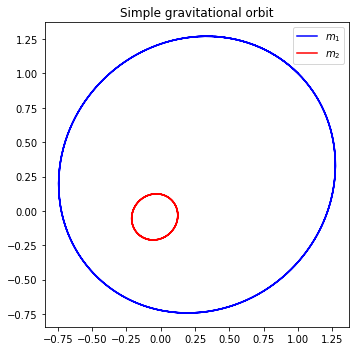

In [6]:
#Plotting time
t_start = 0.
t_end = 10.
delta_t = 0.01

G = 1.
m_1 = 1.
m_2 = 6.

#Create set of orbits
o1 = GravOrbits(m_1, m_2, G)

#Inital conditions (com velocity 0)
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = o1.solve_ode(t_pts, z_0)

#start plotting
fig = plt.figure(figsize=(5,5))

#overall title ...

#first plot: orbit
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
#fig.savefig('simple_orbits.png', bbox_inches='tight')

## Do our more massive orbit

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


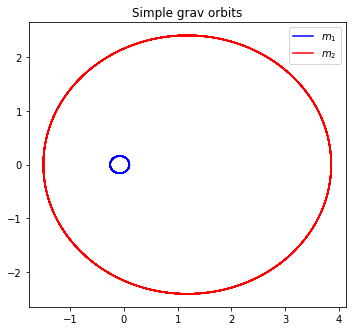

In [7]:
#Common plotting time
t_start = 0.
t_end = 20.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)
G = 10.
m_1 = 15.
m_2 = 1.

#Create set of orbits
o1 = GravOrbits(m_1, m_2, G)

#Inital conditions
x_1_0, x_dot_1_0 = 0.1, 0.
y_1_0, y_dot_1_0 = 0., 0.75
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = o1.solve_ode_Leapfrog_n(t_pts, z_0)

#Start plotting
fig = plt.figure(figsize=(5,5))

#orbit plot
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple grav orbits')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
#fig.savefig()